In [1]:
def DFtoUSE(df,rpc_threshfold,Normal_RP,MS2_RP,RNAseq):
    RP_include = df_base_CDS['gene'].isin(df_base_CDS['gene']) # just make all rows to be TRUE 
    MS2_include = RP_include # just make all rows to be TRUE 
    RNA_include = RP_include # just make all rows to be TRUE
    if Normal_RP != 'no':
        RP_include = df_base_CDS[Normal_RP+'_rpc'] > rpc_threshfold
    if MS2_RP != 'no':
        MS2_include = df_base_CDS[MS2_RP+'_rpc'] > rpc_threshfold
    if RNAseq != 'no':
        RNA_include = df_base_CDS[RNAseq+'_rpc'] > rpc_threshfold
    df_to_use = df[RP_include & MS2_include & RNA_include]
    return df_to_use

In [2]:
import pickle
import numpy as np
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import mlab
import seaborn as sns
%matplotlib inline


mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [3]:
df_base_CDS = pd.read_csv('SDfigure.csv')
df_base_CDS = df_base_CDS.loc[:,~df_base_CDS.columns.str.contains('^Unnamed')]
df_base_CDS['negative_SD_aSD']=df_base_CDS['SD_aSD']*-1
df_base_CDS

,gene,ks57_reads,ks57_rpc,ks57_rpkm,ks58_reads,ks58_rpc,ks58_rpkm,ks59_reads,ks59_rpc,ks59_rpkm,...,Zhang_mmc2_Gini_6hr,Zhang_mmc2_TE_30min,Zhang_mmc2_TE_6hr,Zhang_mmc2_Filter_vivo,Zhang_mmc2_Gini_vitro,Zhang_mmc2_Gini_ksg,Zhang_mmc2_Filter_vitro_ksg,Shape_median,Shape_seq,negative_SD_aSD
0,aaaD,3.0,0.029126,2.921452,2.0,0.019417,2.100146,2.0,0.019417,1.054992,...,0.940,NaN,NaN,NO,0.926,0.987,NO,NaN,NaN,5.184330
1,aaaE,7.0,0.018519,1.857466,1.0,0.002646,0.286131,3.0,0.007937,0.431207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.724650
2,aaeA,2.0,0.006431,0.645037,1.0,0.003215,0.347773,7.0,0.022508,1.222909,...,0.782,0.000,1.698,NO,0.815,0.929,NO,NaN,NaN,4.107930
3,aaeB,3.0,0.004573,0.458704,3.0,0.004573,0.494623,8.0,0.012195,0.662587,...,0.772,0.000,0.000,NO,0.825,0.934,NO,NaN,NaN,1.523445
4,aaeR,76.0,0.245161,24.590456,81.0,0.261290,28.260511,88.0,0.283871,15.423305,...,0.676,0.390,0.638,NO,0.705,0.835,NO,NaN,NaN,0.359835
5,aaeX,2.0,0.029412,2.950093,0.0,0.000000,0.000000,4.0,0.058824,3.196006,...,0.884,0.318,2.095,NO,0.819,0.947,NO,NaN,NaN,1.747805
6,aas,165.0,0.229167,22.986145,158.0,0.219444,23.734565,235.0,0.326389,17.733393,...,0.617,0.390,1.771,NO,0.671,0.799,NO,NaN,NaN,5.931100
7,aat,50.0,0.212766,21.341101,38.0,0.161702,17.489299,49.0,0.208511,11.328820,...,0.695,0.091,0.287,NO,0.657,0.805,NO,NaN,NaN,3.607930
8,abgA,4.0,0.009153,0.918107,4.0,0.009153,0.990000,19.0,0.043478,2.362265,...,0.915,0.000,0.000,NO,0.970,0.985,NO,NaN,NaN,3.656165
9,abgB,6.0,0.012448,1.248587,8.0,0.016598,1.795145,5.0,0.010373,0.563611,...,0.942,0.000,0.000,NO,0.965,0.985,NO,NaN,NaN,5.395080


In [4]:
base_Normal_RP = 'no'
base_MS2_RP = 'ks61'
base_RNAseq = 'ks65'
Normal_RP = 'no'
MS2_RP = 'ks64'
RNAseq = 'ks68'

data_for_sorting = 'FD_TE_wt/A'
rpc_threshfold = 0.1

base = 'SD_aSD'

df_by_base = DFtoUSE(df_base_CDS,rpc_threshfold,base_Normal_RP,base_MS2_RP,base_RNAseq)
df_to_use = DFtoUSE(df_by_base,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

/home/kazuki/.pyenv/versions/anaconda2-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [5]:
deltaG_list = [-7.5+x*0.5 for x in range(0,16)]

SaS_low_list = []
SaS_high_list = []
x = 0
while x < len(deltaG_list)-1:
    SaS_low_list.append(df_to_use[base] > deltaG_list[x])
    SaS_high_list.append(df_to_use[base] <= deltaG_list[x+1])
    x+=1
    
SaS_DF_list = []
x=0
while x <len(SaS_low_list):
    SaS_DF_list.append(df_to_use[SaS_low_list[x]&SaS_high_list[x]])
    x+=1

In [6]:
DF_coupling=[]

QT_list_top = [1.0,0.2]
QT_list_bottom = [0.8,0.0]

x = 0
while x < len(QT_list_top):
    DF_list = []
    for SaS_DF in SaS_DF_list:
        top = SaS_DF[data_for_sorting] <= SaS_DF[data_for_sorting].quantile(QT_list_top[x])
        bottom = SaS_DF[data_for_sorting] >= SaS_DF[data_for_sorting].quantile(QT_list_bottom[x])
        DF_list.append(SaS_DF[top&bottom])
    DF_concatenate = DF_list[0]
    y = 1
    while y < len(DF_list):
        DF_concatenate = pd.concat([DF_concatenate,DF_list[y]])    
        y+=1
    DF_coupling.append(DF_concatenate) 
    x+=1

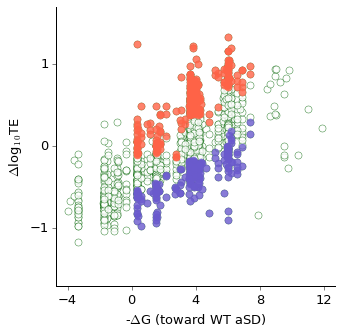

In [8]:
xaxis = 'negative_SD_aSD'
yaxis = 'FD_TE_wt/A'

fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
#fig.set_dpi(500)

x_data = df_to_use[xaxis]
y_data = df_to_use[yaxis].apply(np.log10).replace([np.inf,-np.inf],np.nan)
sns.regplot(x=x_data,y=y_data,ci=68, ax=ax1, fit_reg=False, color = 'darkgreen',scatter_kws={'facecolor':'white','s':50})          

x = 0
colors = ['tomato','slateblue']
while x < len(DF_coupling):
    x_data = DF_coupling[x][xaxis]
    y_data = DF_coupling[x][yaxis].apply(np.log10).replace([np.inf,-np.inf],np.nan)
    sns.regplot(x=x_data,y=y_data,ci=68, ax=ax1, fit_reg=False, color = colors[x],scatter_kws={'facecolor':colors[x],'s':50})                
    x+=1

plt.tick_params(labelsize=13)
ax1.set_xlim(-4.7,12.7,)
ax1.set_ylim(-1.7,1.7)
plt.xticks([-4,0,4,8,12])
plt.yticks([-1,0,1])

plt.xlabel('-'+'$\Delta$'+'G (toward WT aSD)', fontsize=13)
plt.ylabel('$\Delta$'+'log'+'$_1$'+'$_0$'+'TE', fontsize=13)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
sns.despine()

#plt.savefig('coupling_figure/coupling_optimal_scatter.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0)

In [9]:
def boxplot_coupling(d_list):
    palette_box = ['tomato','cornflowerblue']

    axis = sns.boxplot(data=d_list,
                     showfliers=False,linewidth=3,
                     palette=palette_box,
                     capprops={'color': 'black', 'linewidth': 3,"zorder":10},
                     medianprops = {'color': 'black', 'linewidth': 5,"zorder":10}, 
                     boxprops = {'edgecolor': 'black', 'linewidth': 0},
                     whiskerprops={'color': 'black','linewidth':1, "zorder":10})
    axis.xaxis.set_ticks_position('bottom')
    axis.yaxis.set_ticks_position('left')

# mRNA abundance

In [11]:
data_point = 'ks68_rpkm' 
d_list = []

x = 0
while x < len(DF_coupling):
    d_list.append(DF_coupling[x][data_point].apply(np.log10).replace([np.inf,-np.inf],np.nan))
    x+=1

stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='less')
print stat
print p
stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='greater')
print stat
print p

39040.0
1.0
39040.0
1.190949504679068e-24


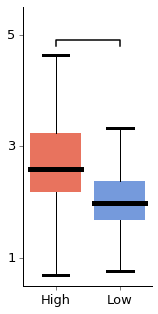

In [13]:
fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(2.3, 5)
ax = boxplot_coupling(d_list)

x1, x2, y1, y2 = 0, 1, 4.8, 4.9
plt.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, color='black')

plt.xticks([0,1],['High','Low'])
plt.yticks([1,3,5])
plt.tick_params(labelsize=13) #####
plt.ylim(0.5,5.5)
sns.despine()
#plt.savefig('coupling_figure/coupling_optimal_mRNA.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####

# SHAPE

In [14]:
data_point = 'Shape_median' 
d_list = []

x = 0
while x < len(DF_coupling):
    d_list.append(DF_coupling[x][data_point].values)
    x+=1

stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='less')
print stat
print p
stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='greater')
print stat
print p

26395.0
0.8300214320707517
26395.0
0.17016330283509973


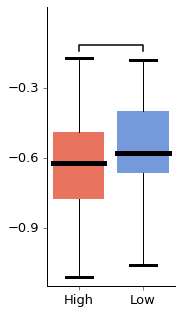

In [15]:
negative_shape_list = []
for shape_data in d_list:
    negative_shape_list.append(shape_data * -1.0)
d_list=negative_shape_list

fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(2.3, 5)
ax = boxplot_coupling(d_list)

x1, x2, y1, y2 = 0, 1, -0.14, -0.115
plt.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, color='black')

plt.xticks([0,1],['High','Low'])
plt.yticks([-0.9,-0.6,-0.3])
plt.ylim(-1.15,0.05)
plt.tick_params(labelsize=13) #####
sns.despine()
#plt.savefig('coupling_figure/coupling_optimal_mRNA.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####

# GINI_ColdShock

1530.5____0.543129739483975
1530.5____0.4590189459651132


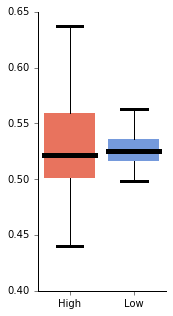

In [17]:
data_point = 'Zhang_mmc2_Gini_30min' 
d_list = []

x = 0
while x < len(DF_coupling):    
    filtered = DF_coupling[x]['Zhang_mmc2_Filter_vivo'] == 'YES'
    df_filtered = DF_coupling[x][filtered]
    d_list.append(df_filtered[data_point])
    x+=1

stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='greater')
print str(stat)+'____'+str(p)
stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='less')
print str(stat)+'____'+str(p)   

fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(2.3, 5)
ax = boxplot_coupling(d_list)

plt.xticks([0,1],['High','Low'])
sns.despine()

#plt.savefig('coupling_figure/coupling_optimal_GINIORF_30.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####

# GINI

8378.5____0.998569275423312
8378.5____0.0014372237386076892


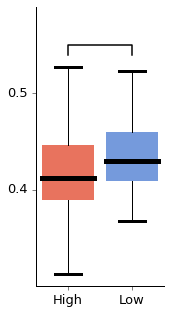

In [18]:
data_point = 'GINI' 
d_list = []

x = 0
while x < len(DF_coupling):
    filtered = DF_coupling[x][data_point].notnull()
    df_filtered = DF_coupling[x][filtered]
    d_list.append(df_filtered[data_point])
    x+=1

stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='greater')
print str(stat)+'____'+str(p)
stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='less')
print str(stat)+'____'+str(p)
    
fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(2.3, 5)
ax = boxplot_coupling(d_list)

x1, x2, y1, y2 = 0, 1, 0.54, 0.55
plt.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, color='black')

plt.xticks([0,1],['High','Low'])
plt.yticks([0.4,0.5])
plt.ylim(0.3,0.59)
plt.tick_params(labelsize=13) #####
sns.despine()

#plt.savefig('coupling_figure/coupling_optimal_GINIORF.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####

# First gene VS downstream genes

In [ ]:
def FisherExact(data1_from_group1,data1_from_group2,data2_from_group1,data2_from_group2):
    oddsratio, pvalue = stats.fisher_exact([[data1_from_group1,data1_from_group2],[data2_from_group1,data2_from_group2]])
    print [oddsratio, pvalue]

In [19]:
import pickle

with open('/home/kazuki/^data_analysis/^Ecoli_Genome/Ecoli_TU_CDS.pickle','rb') as f:
    CDS_TU_dict=pickle.load(f)
    
mono_or_first = [] 
others = []
for TU in CDS_TU_dict.keys():
    if CDS_TU_dict[TU]['MorP']=='Mono':
        mono_or_first.append(TU)
    if CDS_TU_dict[TU]['MorP']=='Poly':
        TU_list = TU.split('-')
        mono_or_first.append(TU_list[0])
        others = others+TU_list[1:]
MorP_dict = {}
MorP_dict['mono_or_first']=mono_or_first
MorP_dict['others']=others

In [21]:
data_all=[]

x = 0
while x < len(DF_coupling):
    MoF = DF_coupling[x]['gene'].isin(MorP_dict['mono_or_first'])
    others = DF_coupling[x]['gene'].isin(MorP_dict['others'])
    MoF_number = len(DF_coupling[x][MoF]) 
    others_number = len(DF_coupling[x][others])
    data_group=[MoF_number,others_number]
    data_all.append(data_group)
    x+=1

In [24]:
fisher = FisherExact(data_all[0][0],data_all[1][0],data_all[0][1],data_all[1][1])
fisher

[0.9004460303300624, 0.6226413562196289]


In [25]:
data_ratio=[]
x=0
while x < len(data_all):
    first_ratio = float(data_all[x][0])/(data_all[x][0]+data_all[x][1])
    others_ratio = 1-first_ratio
    data_ratio.append([first_ratio,others_ratio])
    x+=1

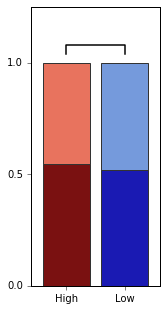

In [27]:
fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(2.3, 5)

FirstBars=[data_ratio[0][1],data_ratio[1][1]]
ax = sns.barplot(x=['High','Low'], y=FirstBars,
                 palette = ['darkred','mediumblue'],linewidth=1,edgecolor=".2")

OtherBars=[data_ratio[0][0],data_ratio[1][0]]
ax = sns.barplot(x=['High','Low'], y=OtherBars,bottom=FirstBars,
                 palette = ['tomato','cornflowerblue'],linewidth=1,edgecolor=".2")

x1, x2, y1, y2 = 0, 1, 1.04, 1.08
plt.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, color='black')

#plt.tick_params(labelsize=15)
plt.xlim(-0.6,1.6)
plt.yticks([0,0.5,1])
plt.ylim(0,1.25)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#sns.despine()
#plt.savefig('fig_coupling/coupling_optimal_operon.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####

# Start codon types

In [30]:
with open('/home/kazuki/^data_analysis/^Ecoli_Genome/start_codon_type.pickle','rb') as f:
    start_codon_type = pickle.load(f)

In [31]:
othercodons=[]

for key in start_codon_type.keys():
    if key == 'ATG':
        print key+'_'+str(len(start_codon_type[key]))
    elif key == 'GTG':
        print key+'_'+str(len(start_codon_type[key]))
    else:
        othercodons=othercodons+start_codon_type[key]
        
print 'else_'+str(len(othercodons)) 

ATG_3845
GTG_330
else_339


In [32]:
data_all=[]

x = 0
while x < len(DF_coupling):
    ATG = DF_coupling[x]['gene'].isin(start_codon_type['ATG'])
    GTG = DF_coupling[x]['gene'].isin(start_codon_type['GTG'])
    others = DF_coupling[x]['gene'].isin(othercodons)
    ATG_number = len(DF_coupling[x][ATG]) 
    others_number = len(DF_coupling[x][GTG]) + len(DF_coupling[x][others]) 
    data_all.append([ATG_number,others_number])
    x+=1

In [34]:
fisher = FisherExact(data_all[0][0],data_all[1][0],data_all[0][1],data_all[1][1])
fisher

[0.6410256410256411, 0.24588290637715654]


In [37]:
data_ratio=[]
x=0
while x < len(data_all):
    first_ratio = float(data_all[x][0])/(data_all[x][0]+data_all[x][1])
    others_ratio = 1-first_ratio
    data_ratio.append([first_ratio,others_ratio])
    x+=1

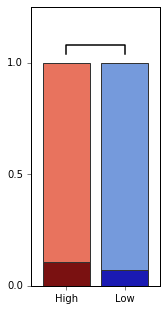

In [38]:
fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(2.3, 5)


FirstBars=[data_ratio[0][1],data_ratio[1][1]]
ax = sns.barplot(x=['High','Low'], y=FirstBars,
                 palette = ['darkred','mediumblue'],linewidth=1,edgecolor=".2")

OtherBars=[data_ratio[0][0],data_ratio[1][0]]
ax = sns.barplot(x=['High','Low'], y=OtherBars,bottom=FirstBars,
                 palette = ['tomato','cornflowerblue'],linewidth=1,edgecolor=".2")

x1, x2, y1, y2 = 0, 1, 1.04, 1.08
plt.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, color='black')

#plt.tick_params(labelsize=15)
plt.yticks([0,0.25,0.5,0.75,1,1.25])
plt.yticks([0,0.5,1])
plt.ylim(0,1)

#plt.tick_params(labelsize=15)
plt.xlim(-0.6,1.6)
plt.yticks([0,0.5,1])
plt.ylim(0,1.25)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#sns.despine()
#plt.savefig('fig_coupling/coupling_optimal_AUG.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####

# tAI

In [40]:
tAI_DF = pd.read_csv('/home/kazuki/^data_analysis/^tAI_CAI/tAI_result.csv')
tAI_DF = tAI_DF.set_index('Unnamed: 0')
tAI_DF

,seq,3_mean,3_median,6_mean,6_median,9_mean,9_median,18_mean,18_median,27_mean,...,36_mean,36_median,45_mean,45_median,54_mean,54_median,63_mean,63_median,72_mean,72_median
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
rbfA,GCGAAAGAATTTGGTCGCCCGCAGCGCGTAGCGCAGGAAATGCAAA...,0.120000,0.120000,0.435000,0.435000,0.456667,0.500000,0.343208,0.289750,0.323806,...,0.332437,0.330000,0.382617,0.330000,0.382617,0.330000,0.382617,0.330000,0.382617,0.330000
xapA,TCTCAGGTTCAATTTTCTCATAACCCGCTGTTTTGCATAGATATTA...,0.109750,0.109750,0.219875,0.219875,0.183167,0.109750,0.169833,0.109750,0.193208,...,0.209469,0.117375,0.200405,0.163204,0.200405,0.163204,0.200405,0.163204,0.200405,0.163204
xapB,AGCATCGCGATGCGCTTAAAGGTAATGTCCTTTTTGCAATATTTTA...,0.125000,0.125000,0.250000,0.250000,0.206667,0.125000,0.350833,0.242500,0.441111,...,0.374563,0.245000,0.334608,0.240000,0.334608,0.240000,0.334608,0.240000,0.334608,0.240000
yeaI,ATTCAGTCAACACGTATTTCCATGGGGTTATTCTTTAAATATTTTT...,0.164625,0.164625,0.247312,0.247312,0.206542,0.164625,0.234875,0.164625,0.313806,...,0.275750,0.164813,0.288892,0.164625,0.288892,0.164625,0.288892,0.164625,0.288892,0.164625
rhtC,TTGATGTTATTTCTCACCGTCGCCATGGTGCACATTGTGGCGCTTA...,0.165000,0.165000,0.582500,0.582500,0.430000,0.165000,0.295792,0.145000,0.363861,...,0.313698,0.182500,0.275950,0.165000,0.275950,0.165000,0.275950,0.165000,0.275950,0.165000
abrB,CCAGTTTTGCAGTGGGGAATGTTATGTGTGCTATCACTTCTCCTTT...,0.125000,0.125000,0.117375,0.117375,0.133250,0.125000,0.169958,0.145000,0.244403,...,0.220802,0.125000,0.192292,0.125000,0.192292,0.125000,0.192292,0.125000,0.192292,0.125000
lldD,ATTATTTCCGCAGCCAGCGATTATCGCGCCGCAGCGCAACGCATTC...,0.164625,0.164625,0.164625,0.164625,0.193083,0.164625,0.221542,0.207313,0.224278,...,0.230292,0.207313,0.235875,0.250000,0.235875,0.250000,0.235875,0.250000,0.235875,0.250000
xapR,GAACGCGTATACAGAACAGATCTTAAGTTGCTCCGTTATTTTCTTG...,0.500000,0.500000,0.430000,0.430000,0.495000,0.500000,0.351667,0.367500,0.285500,...,0.279958,0.202500,0.245917,0.164625,0.245917,0.164625,0.245917,0.164625,0.245917,0.164625
speF,TCAAAATTAAAAATTGCGGTTAGTGATTCTTGCCCGGACTGTTTTA...,0.125000,0.125000,0.437500,0.437500,0.333333,0.125000,0.339104,0.144813,0.262653,...,0.230302,0.125000,0.220217,0.125000,0.220217,0.125000,0.220217,0.125000,0.220217,0.125000


In [41]:
tAI_type = '18_median'
d_list=[]

x=0
while x < len(DF_coupling):
    D_tAI=[]
    for gene in DF_coupling[x]['gene']:
        D_tAI.append(tAI_DF.loc[gene][tAI_type])
    d_list.append(D_tAI)
    x+=1

stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='less')
print stat
print p
stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='greater')
print stat
print p

27718.5
0.9726388027427717
27718.5
0.027407249479164984


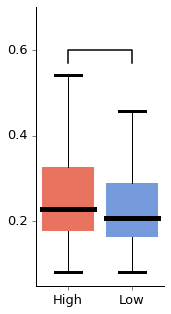

In [43]:
fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(2.3, 5)
ax = boxplot_coupling(d_list)

x1, x2, y1, y2 = 0, 1, 0.57, 0.6
plt.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, color='black')

plt.xticks([0,1],['High','Low'])
plt.yticks([0.2,0.4,0.6])
plt.ylim(0.05,0.7)
plt.tick_params(labelsize=13) #####
sns.despine()
#plt.savefig('fig_coupling/coupling_optimal_tAI.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####

# CAI

In [45]:
CAI_DF = pd.read_csv('/home/kazuki/^data_analysis/^tAI_CAI/CAIcal_result.csv')
CAI_DF = CAI_DF.set_index('Name')
CAI_DF

,9_CAI,18_CAI,27_CAI,36_CAI,45_CAI,54_CAI,63_CAI,72_CAI
Name,,,,,,,,
yeaN,0.894,0.791,0.855,0.889,0.760,0.741,0.764,0.703
xapA,0.767,0.720,0.803,0.848,0.762,0.691,0.689,0.694
xapB,0.842,0.902,0.714,0.742,0.746,0.685,0.716,0.683
galR,0.496,0.518,0.517,0.559,0.586,0.612,0.631,0.662
rhtB,1.000,1.000,0.954,0.852,0.850,0.876,0.816,0.781
yeaH,1.000,0.611,0.716,0.785,0.814,0.841,0.855,0.865
eutN,0.818,0.580,0.549,0.599,0.628,0.625,0.649,0.678
abrB,0.498,0.508,0.590,0.554,0.459,0.505,0.513,0.505
pabC,0.914,0.887,0.825,0.823,0.810,0.705,0.725,0.732


In [46]:
CAI_type = '18_CAI'
d_list=[]

x=0
while x < len(DF_coupling):
    D_CAI=[]
    for gene in DF_coupling[x]['gene']:
        if gene[:2]=='f=':
            continue
        D_CAI.append(CAI_DF.loc[gene][CAI_type])
    d_list.append(D_CAI)
    x+=1

stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='less')
print stat
print p
stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='greater')
print stat
print p

25732.5
0.6810876733231211
25732.5
0.31917299532643223


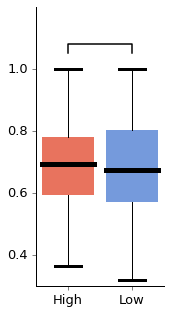

In [48]:
fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(2.3, 5)

ax = boxplot_coupling(d_list)

x1, x2, y1, y2 = 0, 1, 1.05, 1.08
plt.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, color='black')

plt.xticks([0,1],['High','Low'])
plt.yticks([0.4,0.6,0.8,1.0])
plt.ylim(0.3,1.2)
plt.tick_params(labelsize=13) #####
sns.despine()
#plt.savefig('fig_coupling/coupling_optimal_CAI.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####

# Distance

In [49]:
data_range = []
for distance in df_to_use['BandD_distance'].values:
    if distance not in data_range:
        data_range.append(distance)
        
print min(data_range)
print max(data_range)

-2.0
19.0


In [50]:
data_point = 'BandD_distance'

#d_list = [df_to_use[data_point],DF_coupling[0][data_point],DF_coupling[1][data_point]]

data_high = []    
for value in DF_coupling[0][data_point].values:
    data_high.append(-1*value)
data_low = []
for value in DF_coupling[1][data_point].values:
    data_low.append(-1*value)
d_list=[data_high,data_low]

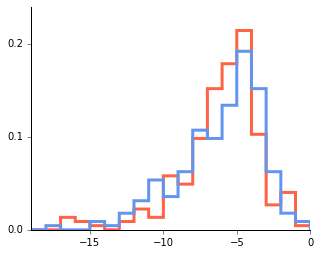

In [51]:
fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(5, 4) 

binsetting = [y for y in range(-20,10)]
colors=['tomato','cornflowerblue']

x = 0
while x < len(d_list):
    distribution = d_list[x]  
    ax = sns.distplot(distribution, rug=False, norm_hist=True,
                      hist=True, hist_kws={"histtype": "step", "linewidth": 3,  "alpha": 1}, 
                      kde=False, kde_kws={"lw": 5,"color": colors[x]},
                      color=colors[x], bins=binsetting)
    x+=1 

#plt.tick_params(labelsize=15)
plt.yticks([0,0.1,0.2])
plt.ylim(0,0.24)
plt.xlim(-19,0)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

#plt.savefig('fig_coupling/coupling_optimal_distance.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####